In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

In [37]:
df = pd.read_csv('/kaggle/input/diabetes-data-set/diabetes.csv')
df.shape

(768, 9)

In [38]:
[col for col in df.columns if df[col].isnull().sum()>0]

[]

In [39]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop(labels = ['Outcome'],axis = 1),
    df['Outcome'],
    test_size = 0.3,
    random_state = 0
)

In [40]:
constant_features = [
    features for features in x_train.columns if x_train[features].std()==9
]
len(constant_features)

0

###  **Constant Features**

In [59]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Create a DataFrame with 100 rows and 5 random features
data = {
    'feature_1': np.random.normal(0, 1, 100),
    'feature_2': np.random.normal(5, 2, 100),
    'feature_3': np.random.randint(0, 10, 100),
    
    # Constant features
    'feature_4': 0,             # All zeros
    'feature_5': 3.1415         # All the same value
}

df = pd.DataFrame(data)

# Add a target column (for ML use)
df['target'] = np.random.choice([0, 1], size=100)

# Save to CSV (optional)
# df.to_csv("raw_dataset_with_constant_features.csv", index=False)

print(df.head())


   feature_1  feature_2  feature_3  feature_4  feature_5  target
0   0.496714   2.169259          1          0     3.1415       1
1  -0.138264   4.158709          9          0     3.1415       1
2   0.647689   4.314571          0          0     3.1415       1
3   1.523030   3.395445          7          0     3.1415       0
4  -0.234153   4.677429          0          0     3.1415       1


In [60]:
[col for col in df.columns if df[col].isnull().sum()>0]

[]

### **Quasi Constant Features**

In [69]:
quasi_constant_features = []
for feature in x_train.columns:
    predominant = (x_train[feature].value_counts()/np.float64(len(x_train))).sort_values(ascending=False).values[0]
    if predominant > 0.999:
        quasi_constant_features.append(feature)


0

# **Raw Data**

## Dataset 1

In [67]:
import pandas as pd

# Load SECOM data and labels
data = pd.read_csv('/kaggle/input/secom-data/secom_data.csv', sep='\s+', header=None)
labels = pd.read_csv('/kaggle/input/secom-data/secom_labels.csv', sep='\s+', header=None)

# Keep only the label column (ignore timestamp)
labels = labels[[0]]
labels.columns = ['target']

# Combine features and target
df = pd.concat([data, labels], axis=1)

# Optional: Save combined dataset
df.to_csv('/content/secom_combined.csv', index=False)

# Preview
print(df.shape)
df.head()


(1567, 591)


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,target
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [68]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop(labels = ['target'],axis = 1),
    df['target'],
    test_size = 0.3,
    random_state = 0
)

### **Duplicate Features**

In [51]:
duplicate_feats = []

for i in range(len(x_train.columns)):
    col_1 = x_train.columns[i]
    for j in range(i + 1, len(x_train.columns)):
        col_2 = x_train.columns[j]
        if x_train[col_1].equals(x_train[col_2]):
            duplicate_feats.append(col_2)

print("Duplicate features:", duplicate_feats)
duplicate_features = set(duplicate_feats)
print(len(duplicate_features))
x_train.drop(labels = duplicate_features,axis = 1,inplace=True)
x_test.drop(labels = duplicate_features,axis = 1,inplace=True)



Duplicate features: [149, 284, 422, 179, 186, 189, 315, 322, 325, 451, 458, 461, 226, 229, 230, 231, 232, 233, 234, 235, 236, 237, 240, 241, 242, 243, 364, 369, 370, 371, 372, 373, 374, 375, 378, 379, 380, 381, 498, 501, 502, 503, 504, 505, 506, 507, 508, 509, 512, 513, 514, 515, 276, 414, 284, 422, 313, 314, 449, 450, 186, 189, 315, 322, 325, 451, 458, 461, 189, 315, 322, 325, 451, 458, 461, 315, 322, 325, 451, 458, 461, 191, 192, 193, 194, 326, 327, 328, 329, 330, 462, 463, 464, 465, 466, 192, 193, 194, 326, 327, 328, 329, 330, 462, 463, 464, 465, 466, 193, 194, 326, 327, 328, 329, 330, 462, 463, 464, 465, 466, 194, 326, 327, 328, 329, 330, 462, 463, 464, 465, 466, 326, 327, 328, 329, 330, 462, 463, 464, 465, 466, 229, 230, 231, 232, 233, 234, 235, 236, 237, 240, 241, 242, 243, 364, 369, 370, 371, 372, 373, 374, 375, 378, 379, 380, 381, 498, 501, 502, 503, 504, 505, 506, 507, 508, 509, 512, 513, 514, 515, 230, 231, 232, 233, 234, 235, 236, 237, 240, 241, 242, 243, 364, 369, 370, 371,

In [52]:
duplicate_feats = []

for i in range(len(x_train.columns)):
    col_1 = x_train.columns[i]
    for j in range(i + 1, len(x_train.columns)):
        col_2 = x_train.columns[j]
        if x_train[col_1].equals(x_train[col_2]):
            duplicate_feats.append(col_2)

print("Duplicate features:", duplicate_feats)
duplicate_features = set(duplicate_feats)
print(len(duplicate_features))

Duplicate features: []
0


### Quasi Constant

In [69]:
quasi_constant_features = []
for feature in x_train.columns:
    predominant = (x_train[feature].value_counts()/np.float64(len(x_train))).sort_values(ascending=False).values[0]
    if predominant > 0.999:
        quasi_constant_features.append(feature)
print(len(quasi_constant_features))
x_train.drop(labels = quasi_constant_features,axis = 1,inplace=True)
x_test.drop(labels = quasi_constant_features,axis = 1,inplace=True)


16


In [70]:
quasi_constant_features = []
for feature in x_train.columns:
    predominant = (x_train[feature].value_counts()/np.float64(len(x_train))).sort_values(ascending=False).values[0]
    if predominant > 0.999:
        quasi_constant_features.append(feature)
len(quasi_constant_features)

0

### Constant Features

In [33]:
constant_features = [
    features for features in x_train.columns if x_train[features].std()==0
]
len(constant_features)

116

In [37]:
x_train.drop(labels = constant_features,axis = 1,inplace=True)
x_test.drop(labels = constant_features,axis = 1,inplace=True)
constant_features = [
    features for features in x_train.columns if x_train[features].std()==0
]
len(constant_features)

0

NaN values

In [60]:
print(df.isna().sum().sort_values(ascending=False).head())


157    1429
292    1429
293    1429
158    1429
492    1341
dtype: int64


Removing NaN with threshold 90%

In [62]:
threshold = 0.9
df = df.loc[:, df.isna().mean() < threshold]
print(f"Remaining columns: {df.shape[1]}")

Remaining columns: 587


Filling rest of NaN values

In [63]:
# Fill remaining NaNs with column median
df = df.fillna(df.median(numeric_only=True))


In [64]:
print(df.isna().sum().sort_values(ascending=False).head())


0      0
407    0
391    0
392    0
393    0
dtype: int64


### **Correlation**

In [10]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop(labels=['target'], axis=1),
    df['target'],
    test_size=0.3,
    random_state=0
)

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


<Axes: >

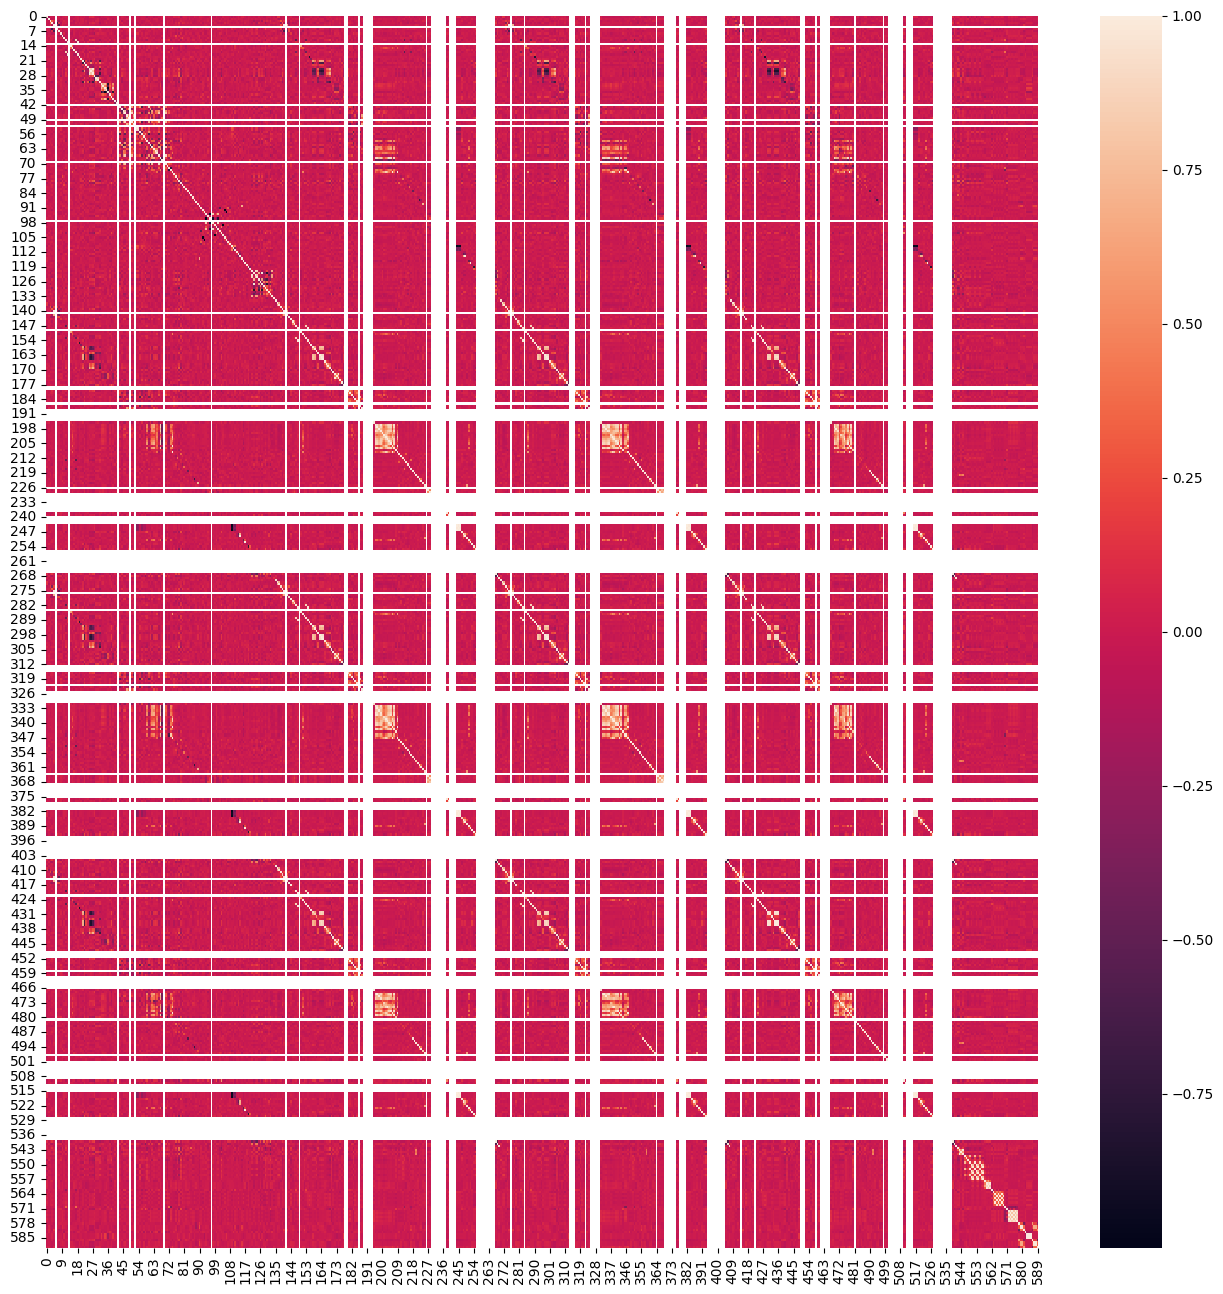

In [13]:
corr_mat = x_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(16,16)
sns.heatmap(corr_mat)

In [15]:
grouped_feature_ls = []
correlated_groups = []

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # absolute correlation value
                colname = corr_matrix.columns[i]  # get column name
                col_corr.add(colname)
    return col_corr

# Usage example:
corr_features = correlation(x_train, 0.9)  # filter for features with correlation > 0.9
correlated_features = set(corr_features)  # unique features in the set
print(len(correlated_features))  # number of correlated features


209


In [16]:
x_train.drop(labels=correlated_features,axis = 1,inplace = True)
x_test.drop(labels=correlated_features,axis = 1,inplace = True)

In [17]:
grouped_feature_ls = []
correlated_groups = []

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # absolute correlation value
                colname = corr_matrix.columns[i]  # get column name
                col_corr.add(colname)
    return col_corr

# Usage example:
corr_features = correlation(x_train, 0.9)  # filter for features with correlation > 0.9
correlated_features = set(corr_features)  # unique features in the set
print(len(correlated_features))  # number of correlated features


0


### **Mutual Information**

41     0.036904
125    0.025625
369    0.024257
130    0.023514
126    0.023115
         ...   
109    0.000000
370    0.000000
108    0.000000
102    0.000000
0      0.000000
Length: 377, dtype: float64


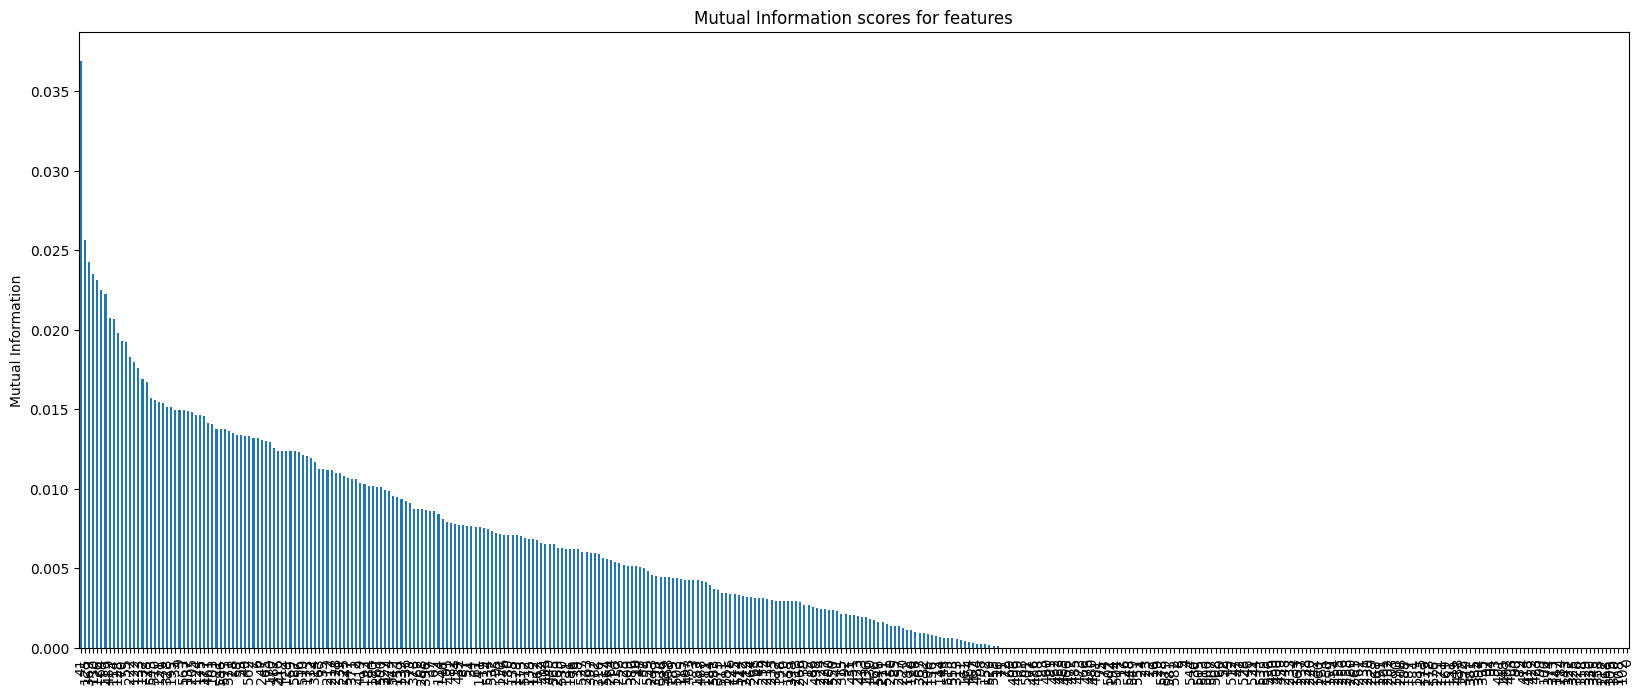

In [21]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import matplotlib.pyplot as plt

# fill missing values before MI computation
mi = mutual_info_classif(x_train.fillna(0), y_train, random_state=42)

# wrap into a pandas Series for readability
mi = pd.Series(mi, index=x_train.columns)

# sort and display
mi_sorted = mi.sort_values(ascending=False)
print(mi_sorted)

# plot
plt.figure(figsize=(20, 8))
mi_sorted.plot(kind="bar")
plt.title("Mutual Information scores for features")
plt.ylabel("Mutual Information")
plt.show()


In [25]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Select top 10 features using Mutual Information
sel_ = SelectKBest(score_func=mutual_info_classif, k=10)
sel_.fit(x_train.fillna(0), y_train)

# Get the names of selected features
selected_features = x_train.columns[sel_.get_support()]
print("Top 10 features selected by mutual information:")
print(selected_features)


Top 10 features selected by mutual information:
Index([41, 55, 64, 119, 122, 125, 126, 130, 372, 562], dtype='object')


In [31]:
# transform X_train and X_test to keep only selected features
X_train_selected = sel_.transform(x_train.fillna(0))
X_test_selected = sel_.transform(x_test.fillna(0))

# if you want a DataFrame with the feature names preserved:
selected_feature_names = x_train.columns[sel_.get_support()]
X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_feature_names, index=x_train.index)
X_test_selected_df = pd.DataFrame(X_test_selected, columns=selected_feature_names, index=x_test.index)

print("Transformed X_train shape:", X_train_selected_df.shape)
print("Transformed X_test shape:", X_test_selected_df.shape)


Transformed X_train shape: (1096, 10)
Transformed X_test shape: (471, 10)


## Madelon

In [74]:
import pandas as pd
import numpy as np

# Load training features
X_train = pd.read_csv('/kaggle/input/madelon-direct/madelon_train.data', sep='\s+', header=None)

# Load training labels
y_train = pd.read_csv('/kaggle/input/madelon-direct/madelon_train.labels', sep='\s+', header=None)
y_train = y_train[0]  # convert to Series

# Optionally: load validation and test data
X_valid = pd.read_csv('/kaggle/input/madelon-direct/madelon_valid.data', sep='\s+', header=None)
X_test = pd.read_csv('/kaggle/input/madelon-direct/madelon_test.data', sep='\s+', header=None)

# Confirm shapes
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_valid:", X_valid.shape)
print("X_test:", X_test.shape)


X_train: (2000, 500)
y_train: (2000,)
X_valid: (600, 500)
X_test: (1800, 500)
